# Given the pre-existing health conditions, which one has a higher correlation to heart disease?

In [1]:
#Dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
heart_df_to_load = Path("Resources/heart_2020_cleaned.csv")
heart_df = pd.read_csv(heart_df_to_load)
heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Data Tables for Heart & Kidney Disease

In [3]:
#Keep the columns with data for Heart Disease and Kidney Disease
# https://www.statology.org/pandas-keep-columns/
kidney_heart = heart_df[["HeartDisease","KidneyDisease"]]
kidney_heart.head()

,HeartDisease,KidneyDisease
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No


In [4]:
#Get the data for those with heart AND kidney disease only
yes_kidney_data = kidney_heart.loc[(heart_df["HeartDisease"]=="Yes") & (heart_df["KidneyDisease"]=="Yes")]
yes_kidney_data.head()

,HeartDisease,KidneyDisease
43,Yes,Yes
78,Yes,Yes
149,Yes,Yes
184,Yes,Yes
217,Yes,Yes


In [5]:
#Get the data for those with heart disease and NO kidney disease
no_kidney_data = kidney_heart.loc[(heart_df["HeartDisease"]=="Yes") & (heart_df["KidneyDisease"]=="No")]
no_kidney_data.head()

,HeartDisease,KidneyDisease
5,Yes,No
10,Yes,No
35,Yes,No
42,Yes,No
45,Yes,No


## Percentage Distribution of Heart and Kidney Disease

<Axes: ylabel='KidneyDisease'>

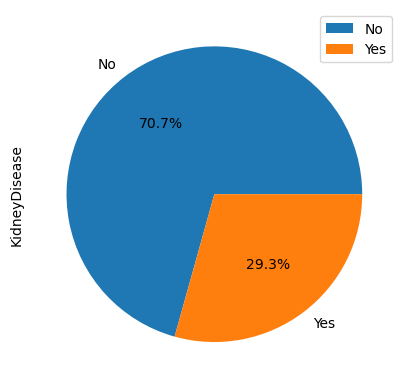

In [6]:
#Visualize the data in a pie chart to show the percentages of our data 
kidney_heart.loc[heart_df["KidneyDisease"]=="Yes"].groupby("HeartDisease").aggregate({"KidneyDisease":"count"}).plot(kind="pie", y="KidneyDisease", autopct="%.1f%%")

#### Conclusion: 29.3%  have heart and kidney disease. 70.7% does not have heart disease but does have kidney disease.

## Data Table for Heart Disease & Skin Cancer

In [7]:
skin_heart = heart_df[["HeartDisease","SkinCancer"]]
skin_heart.head()

,HeartDisease,SkinCancer
0,No,Yes
1,No,No
2,No,No
3,No,Yes
4,No,No


In [8]:
yes_skin_data = skin_heart.loc[(heart_df["HeartDisease"]=="Yes") & (heart_df["SkinCancer"]=="Yes")]
yes_skin_data.head()

,HeartDisease,SkinCancer
35,Yes,Yes
42,Yes,Yes
101,Yes,Yes
129,Yes,Yes
140,Yes,Yes


In [9]:
no_skin_data = skin_heart.loc[(heart_df["HeartDisease"]=="Yes") & (heart_df["SkinCancer"]=="No")]
no_skin_data.head()

,HeartDisease,SkinCancer
5,Yes,No
10,Yes,No
43,Yes,No
45,Yes,No
77,Yes,No


## Percentage Distribution of Heart Disease and Skin Cancer


<Axes: ylabel='SkinCancer'>

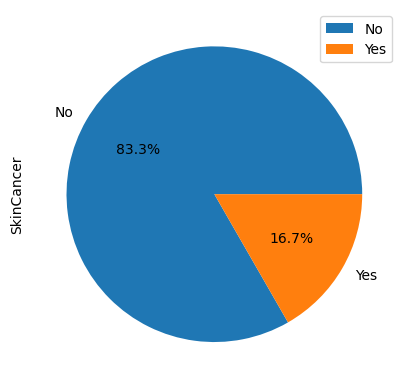

In [10]:
#Visualize the data in a pie chart to show the percentages of our data
skin_heart.loc[heart_df["SkinCancer"]=="Yes"].groupby("HeartDisease").aggregate({"SkinCancer":"count"}).plot(kind="pie", y="SkinCancer", autopct="%.1f%%")

#### Conclusion: 16.7%  have heart disease and skin cancer. 83.3% does not have heart disease but does have skin cancer.

## Data Tables for Heart Disease & Diabetes

In [11]:
diab_heart = heart_df[["HeartDisease","Diabetic"]]
diab_heart.head()

,HeartDisease,Diabetic
0,No,Yes
1,No,No
2,No,Yes
3,No,No
4,No,No


In [12]:
yes_diab_data = diab_heart.loc[(heart_df["HeartDisease"]=="Yes") & (heart_df["Diabetic"]=="Yes")]
yes_diab_data.head()

,HeartDisease,Diabetic
10,Yes,Yes
35,Yes,Yes
42,Yes,Yes
43,Yes,Yes
78,Yes,Yes


In [13]:
no_diab_data = diab_heart.loc[(heart_df["HeartDisease"]=="Yes") & (heart_df["Diabetic"]=="No")]
no_diab_data.head()

,HeartDisease,Diabetic
5,Yes,No
45,Yes,No
77,Yes,No
101,Yes,No
131,Yes,No


## Percentage Distribution of Heart Disease and Diabetes


<Axes: ylabel='Diabetic'>

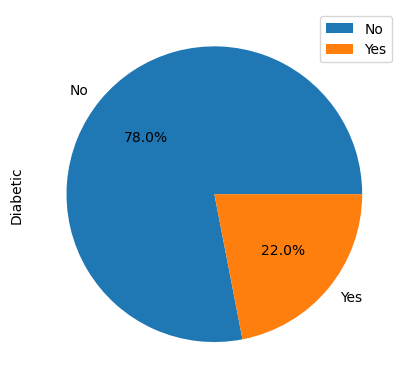

In [14]:
#Visualize the data in a pie chart to show the percentages of our data
diab_heart.loc[heart_df["Diabetic"]=="Yes"].groupby("HeartDisease").aggregate({"Diabetic":"count"}).plot(kind="pie", y="Diabetic", autopct="%.1f%%")

#### Conclusion: 22%  have heart disease and diabetes. 78% does not have heart disease but does have diabetes.

## Data Tables for Heart Disease & Asthma

In [15]:
asthma_heart = heart_df[["HeartDisease","Asthma"]]
asthma_heart.head()

,HeartDisease,Asthma
0,No,Yes
1,No,No
2,No,Yes
3,No,No
4,No,No


In [16]:
yes_asthma_data = asthma_heart.loc[(heart_df["HeartDisease"]=="Yes") & (heart_df["Asthma"]=="Yes")]
yes_asthma_data.head()

,HeartDisease,Asthma
10,Yes,Yes
141,Yes,Yes
142,Yes,Yes
148,Yes,Yes
165,Yes,Yes


In [17]:
no_asthma_data = asthma_heart.loc[(heart_df["HeartDisease"]=="Yes") & (heart_df["Asthma"]=="No")]
no_asthma_data.head()

,HeartDisease,Asthma
5,Yes,No
35,Yes,No
42,Yes,No
43,Yes,No
45,Yes,No


## Percentage Distribution of Heart Disease and Diabetes


<Axes: ylabel='Asthma'>

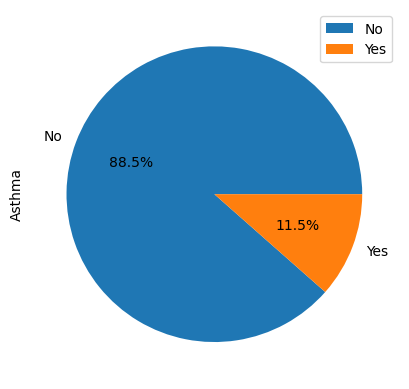

In [18]:
#Visualize the data in a pie chart to show the percentages of our data
asthma_heart.loc[heart_df["Asthma"]=="Yes"].groupby("HeartDisease").aggregate({"Asthma":"count"}).plot(kind="pie", y="Asthma", autopct="%.1f%%")

#### Conclusion: 11.5%  have heart disease and asthma. 88.5% does not have heart disease but does have asthma.